# World Happiness 2015-2019
This python notebook is designed to explore the World Happiness Ratings of 2015 through 2019. The data is from kaggle and can be found here (https://www.kaggle.com/unsdsn/world-happiness)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
sns.set(font='Franklin Gothic Book')
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

In [130]:
hp_2015 = pd.read_csv('2015.csv')
hp_2015['Year'] = '2015'
hp_2016 = pd.read_csv('2016.csv')
hp_2016['Year'] = '2016'
hp_2017 = pd.read_csv('2017.csv')
hp_2017['Year'] = '2017'
hp_2018 = pd.read_csv('2018.csv')
hp_2018['Year'] = '2018'
hp_2019 = pd.read_csv('2019.csv')
hp_2019['Year'] = '2019'

hp_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


Looking at the dataset, there are a lot of different scores included such as Economy, Family Size, Health, Freedom, etc. The value in each column describes the extent to which the factor contributed to the overall happiness score. Ideally, this dataset will help us learn what makes countries the Happiest. Given that America prides itself on Capitalism. Let's check how Economy affects Happiness Scores. 

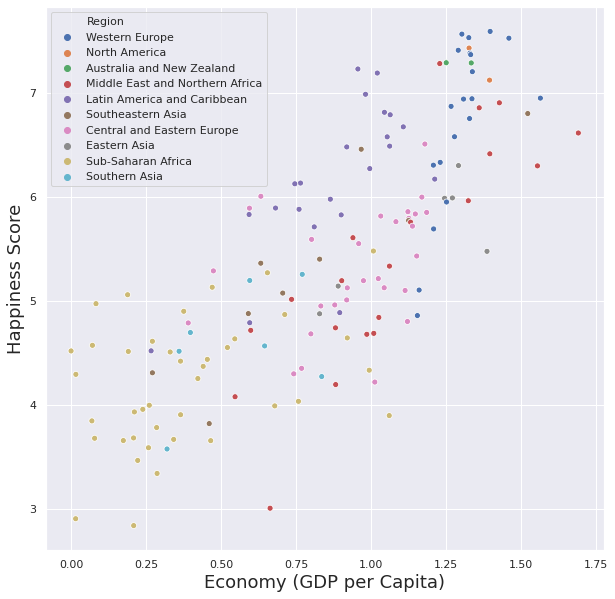

In [131]:
plt.figure(figsize=(10,10))
sns.scatterplot('Economy (GDP per Capita)', 'Happiness Score', data=hp_2015, hue='Region')

What we see here is that as GDP rises, Happiness tends to rise as well, although we can see that there is a lot of variance, especially within the Sub Saharan Africa countries. 

It's also interesting to note that most of the Sub Saharan Africa countries have Happiness Scores of 5 or less, and most of the Western Europe countries are above 6. 

Let's run a correlation on all of the measurements and see how they correlate with Happiness Score.

In [132]:
correlations = hp_2015.corr()
correlations

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


From the correlation matrix for 2015 Happiness Rankings, we can see that Economy, Family, and Health are positively correlated with the Happiness Score. Economy has the strongest correlation but not by much. 

This, however, explains the 2015 data. Let's check how the 2016-2019 data plays out as well. 

In [133]:
corr_2016 = hp_2016[['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom']].corr()
corr_2016

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
Happiness Score,1.000000,0.790322,0.765384,0.566827
Economy (GDP per Capita),0.790322,1.000000,0.837067,0.362283
Health (Life Expectancy),0.765384,0.837067,1.000000,0.341199
Freedom,0.566827,0.362283,0.341199,1.000000


In [134]:
corr_2017 = hp_2017[['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom']].corr()
corr_2017

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
Happiness Score,1.000000,0.812469,0.781951,0.570137
Economy (GDP per Capita),0.812469,1.000000,0.843077,0.369873
Health (Life Expectancy),0.781951,0.843077,1.000000,0.349827
Freedom,0.570137,0.369873,0.349827,1.000000


In [135]:
corr_2018 = hp_2018[['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom']].corr()
corr_2018

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
Happiness Score,1.000000,0.802124,0.775814,0.544280
Economy (GDP per Capita),0.802124,1.000000,0.844273,0.332275
Health (Life Expectancy),0.775814,0.844273,1.000000,0.355475
Freedom,0.544280,0.332275,0.355475,1.000000


In [136]:
corr_2019 = hp_2019[['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom']].corr()
corr_2019

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
Happiness Score,1.000000,0.793883,0.779883,0.566742
Economy (GDP per Capita),0.793883,1.000000,0.835462,0.379079
Health (Life Expectancy),0.779883,0.835462,1.000000,0.390395
Freedom,0.566742,0.379079,0.390395,1.000000


So what we find here is that Economy, Family, and Health do generally correspond about the same regardless of year, albeit not all exactly equal, they don't seem to have significant changes. To see how strongly this holds year to year, let's take the United States and see how their Happiness score has changed in relation to Economy, Family, and Health scores. 

*Note: I only included Economy, Family, and Health for clarity. There were no other correlations with the same strength of correlation.  

In [137]:
def year_over_year(measures, dfs, country='United States'):
  country_over_years = pd.DataFrame()
  for df in dfs:
    temp = df[df['Country'] == country]
    temp = temp[measures]
    country_over_years = pd.concat((country_over_years, temp))
  return country_over_years

usa = year_over_year(['Year', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)'], [hp_2015, hp_2016, hp_2017, hp_2018, hp_2019])
usa

,Year,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy)
14,2015,7.119,1.394510,1.247110,0.861790
12,2016,7.104,1.507960,1.047820,0.779000
13,2017,6.993,1.546259,1.419921,0.774287
17,2018,6.886,1.398000,1.471000,0.819000
18,2019,6.892,1.433000,1.457000,0.874000


In [138]:
usa['Happiness Change'] = usa['Happiness Score'].apply(lambda x: x - 6)
usa

,Year,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Happiness Change
14,2015,7.119,1.394510,1.247110,0.861790,1.119
12,2016,7.104,1.507960,1.047820,0.779000,1.104
13,2017,6.993,1.546259,1.419921,0.774287,0.993
17,2018,6.886,1.398000,1.471000,0.819000,0.886
18,2019,6.892,1.433000,1.457000,0.874000,0.892


To get Happiness Score on the same scale as the rest of our scores, we just subtract 6 so that the scores are centered around 1 now. 

Text(0.5, 1.0, 'US Happiness Score Year over Year')

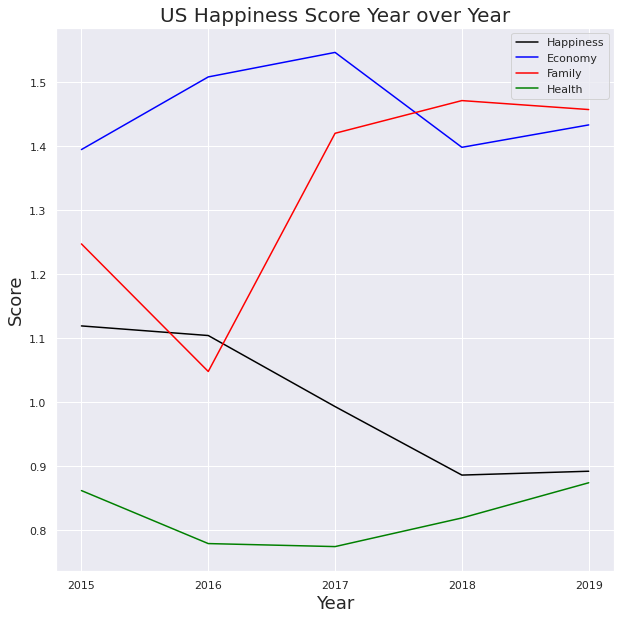

In [139]:
plt.figure(figsize=(10,10))
df = usa

sns.lineplot(x='Year',y='Happiness Change', data=df, color='black', label='Happiness')
sns.lineplot(x='Year',y='Economy (GDP per Capita)', data=df, color='blue', label='Economy')
sns.lineplot(x='Year',y='Family', data=df, color='red', label='Family')
sns.lineplot(x='Year',y='Health (Life Expectancy)', data=df, color='green', label='Health')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('US Happiness Score Year over Year')

Interestingly enough, happiness has been declining over the years in the United States all while the other measures have either been increasing, or staying steady. Let's see if this holds true with other countries. I'll choose Finalnd since they seem to stay atop the rankings year to year and have actually been rising in their Happiness Rank

In [141]:
fin = year_over_year(['Year', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)'], [hp_2015, hp_2016, hp_2017, hp_2018, hp_2019], country='Finland')
fin['Happiness Change'] = fin['Happiness Score'].apply(lambda x: x - 6)
fin

,Year,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Happiness Change
5,2015,7.406,1.290250,1.318260,0.889110,1.406
4,2016,7.413,1.405980,1.134640,0.810910,1.413
4,2017,7.469,1.443572,1.540247,0.809158,1.469
0,2018,7.632,1.305000,1.592000,0.874000,1.632
0,2019,7.769,1.340000,1.587000,0.986000,1.769


Text(0.5, 1.0, 'Finland Happiness Score Year over Year')

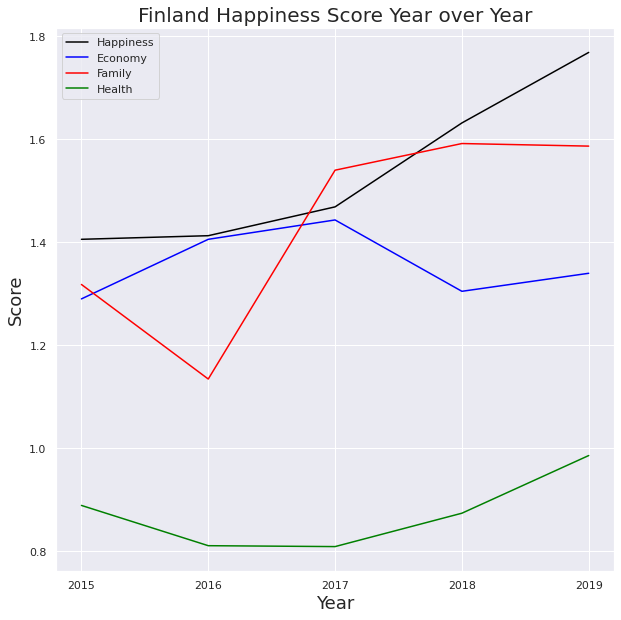

In [142]:
plt.figure(figsize=(10,10))
df = fin

sns.lineplot(x='Year',y='Happiness Change', data=df, color='black', label='Happiness')
sns.lineplot(x='Year',y='Economy (GDP per Capita)', data=df, color='blue', label='Economy')
sns.lineplot(x='Year',y='Family', data=df, color='red', label='Family')
sns.lineplot(x='Year',y='Health (Life Expectancy)', data=df, color='green', label='Health')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Finland Happiness Score Year over Year')

We see similar changes with the three measures for Finland. A convex curve for Health, an increase and plateau for Family, and a slight late increase in Economy, but their Happiness Ranking is through the roof! What gives?

Let's check the correlation table for USA and Finland. 

In [143]:
usa_corr = usa.corr()
usa_corr

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Happiness Change
Happiness Score,1.000000,0.215951,-0.864616,-0.228777,1.000000
Economy (GDP per Capita),0.215951,1.000000,-0.255164,-0.801508,0.215951
Family,-0.864616,-0.255164,1.000000,0.323375,-0.864616
Health (Life Expectancy),-0.228777,-0.801508,0.323375,1.000000,-0.228777
Happiness Change,1.000000,0.215951,-0.864616,-0.228777,1.000000


In [144]:
fin_corr = fin.corr()
fin_corr

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Happiness Change
Happiness Score,1.000000,-0.290548,0.749227,0.791554,1.000000
Economy (GDP per Capita),-0.290548,1.000000,-0.161086,-0.609326,-0.290548
Family,0.749227,-0.161086,1.000000,0.469017,0.749227
Health (Life Expectancy),0.791554,-0.609326,0.469017,1.000000,0.791554
Happiness Change,1.000000,-0.290548,0.749227,0.791554,1.000000


What we see here is that while the overall rankings had strong correlations involving Economy, Family, and Health, they differ on an individual scale, and in some cases (like the US), they differ a great amount. Let's see if there were other factors for the United States that actually correlated strongly with their changes in Happiness Score. 

In [156]:
usa_2 = year_over_year(['Year', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'], [hp_2015, hp_2016, hp_2017, hp_2018, hp_2019])
usa_2_corr = usa_2.corr()
usa_2_corr

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.215951,-0.864616,-0.228777,0.175874,0.935903,0.926392
Economy (GDP per Capita),0.215951,1.000000,-0.255164,-0.801508,-0.446964,-0.122639,0.510947
Family,-0.864616,-0.255164,1.000000,0.323375,0.092729,-0.755608,-0.751170
Health (Life Expectancy),-0.228777,-0.801508,0.323375,1.000000,-0.023085,-0.006240,-0.516796
Freedom,0.175874,-0.446964,0.092729,-0.023085,1.000000,0.428364,0.168730
Trust (Government Corruption),0.935903,-0.122639,-0.755608,-0.006240,0.428364,1.000000,0.783696
Generosity,0.926392,0.510947,-0.751170,-0.516796,0.168730,0.783696,1.000000


Looking at all the measures for the US, there is a much stronger correlation between Happiness Score and Trust and Generosity. Interestingly, Freedom had a very low correlation. But we can still see why this makes sense, the US prides itself on it's government and its communities. Let's see about Finland. 

In [157]:
fin_2 = year_over_year(['Year', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'], [hp_2015, hp_2016, hp_2017, hp_2018, hp_2019], country='Finland')
fin_2_corr = fin_2.corr()
fin_2_corr

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,-0.290548,0.749227,0.791554,0.134183,-0.503196,-0.958863
Economy (GDP per Capita),-0.290548,1.000000,-0.161086,-0.609326,-0.609198,-0.421977,0.467284
Family,0.749227,-0.161086,1.000000,0.469017,0.524348,-0.820438,-0.671542
Health (Life Expectancy),0.791554,-0.609326,0.469017,1.000000,0.070447,-0.022251,-0.931900
Freedom,0.134183,-0.609198,0.524348,0.070447,1.000000,-0.184170,-0.134615
Trust (Government Corruption),-0.503196,-0.421977,-0.820438,-0.022251,-0.184170,1.000000,0.311617
Generosity,-0.958863,0.467284,-0.671542,-0.931900,-0.134615,0.311617,1.000000


Finland's scores are drastically different! While their Happiness Score has a significant correlation with Family and Health, they actually have a strong negative correlation with generosity! 

This shows that different countries have different values and would thus weigh factors differently when calculating their Happiness Score. Since GDP is something that is readily available for each country, let's compare each Country's GDP with their "feeling" about economy from the happiness scores. 

In [148]:
gdp = pd.read_csv('GDP.csv')
gdp.head()

,rank,country,imfGDP,unGDP,gdpPerCapita,pop
0,1,United States,2.219812e+13,18624475000000,67063.2695,331002.651
1,2,China,1.546810e+13,11218281029298,10746.7828,1439323.776
2,3,Japan,5.495420e+12,4936211827875,43450.1405,126476.461
3,4,Germany,4.157120e+12,3477796274497,49617.1450,83783.942
4,5,India,3.257720e+12,2259642382872,2360.6592,1380004.385


In [149]:
hp_2019_gdp = pd.merge(hp_2019, gdp, left_on='Country', right_on='country').drop(columns=['country'])
hp_2019_gdp.head()

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,rank,imfGDP,unGDP,gdpPerCapita,pop
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,44,2.892430e+11,238502900312,52203.1433,5540.720
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,39,3.645460e+11,306899653410,62937.3768,5792.202
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,31,4.386230e+11,371068933176,80908.2275,5421.241
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,106,2.682100e+10,20269659972,78597.9493,341.243
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,17,9.549310e+11,777227541581,55730.2675,17134.872


In [150]:
import math
hp_2019_gdp['LogGDP'] = hp_2019_gdp['gdpPerCapita'].apply(lambda x: math.log(x))
hp_2019_gdp_corr = hp_2019_gdp[['Happiness Score', 'Economy (GDP per Capita)', 'LogGDP', 'rank', 'gdpPerCapita', 'pop']].corr()
hp_2019_gdp_corr

,Happiness Score,Economy (GDP per Capita),LogGDP,rank,gdpPerCapita,pop
Happiness Score,1.000000,0.795460,0.844035,-0.589367,0.737725,-0.067965
Economy (GDP per Capita),0.795460,1.000000,0.968971,-0.691437,0.746380,0.003452
LogGDP,0.844035,0.968971,1.000000,-0.687183,0.826587,-0.014786
rank,-0.589367,-0.691437,-0.687183,1.000000,-0.505415,-0.288475
gdpPerCapita,0.737725,0.746380,0.826587,-0.505415,1.000000,-0.057445
pop,-0.067965,0.003452,-0.014786,-0.288475,-0.057445,1.000000


Text(0, 0.5, 'Perceived Importance to Happiness')

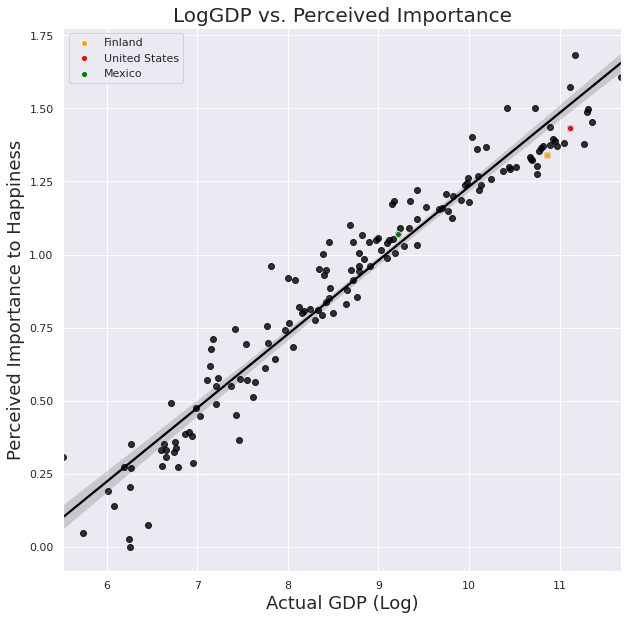

In [151]:
plt.figure(figsize=(10,10))
df = hp_2019_gdp

sns.regplot(x='LogGDP',y='Economy (GDP per Capita)', data=df, color='black')
sns.scatterplot(x='LogGDP',y='Economy (GDP per Capita)', data=df[df['Country'] == 'Finland'], color='orange', label='Finland')
sns.scatterplot(x='LogGDP',y='Economy (GDP per Capita)', data=df[df['Country'] == 'United States'], color='red', label='United States')
sns.scatterplot(x='LogGDP',y='Economy (GDP per Capita)', data=df[df['Country'] == 'Mexico'], color='green', label='Mexico')

plt.legend()
plt.title('LogGDP vs. Perceived Importance')
plt.xlabel('Actual GDP (Log)')
plt.ylabel('Perceived Importance to Happiness')

This provides a little clearer picture of what we were discussing above. It's not entirely clear that that everyone agrees on the same standards to achieve happiness within their Country. As GDP rises, so does a country's perceived importance in its relation to happiness score. However, the graph above took the log of gdp, let's look at it without the logarithm applied. 

Text(0, 0.5, 'Perceived Importance to Happiness')

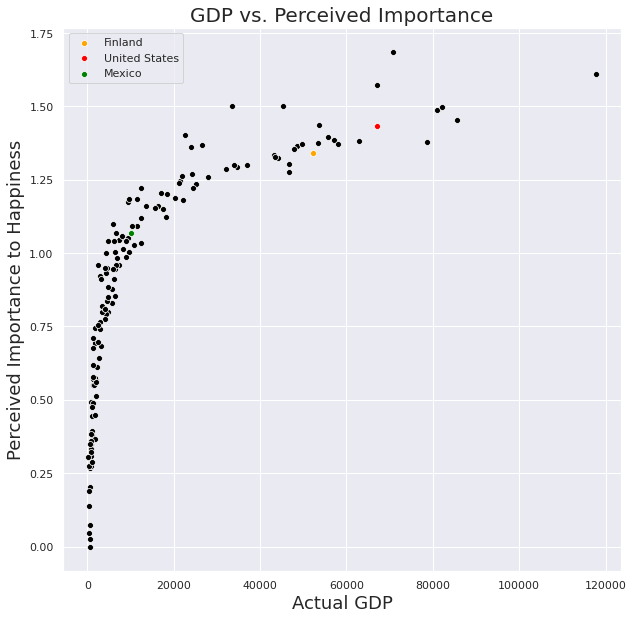

In [152]:
plt.figure(figsize=(10,10))
df = hp_2019_gdp

sns.scatterplot(x='gdpPerCapita',y='Economy (GDP per Capita)', data=df, color='black')
sns.scatterplot(x='gdpPerCapita',y='Economy (GDP per Capita)', data=df[df['Country'] == 'Finland'], color='orange', label='Finland')
sns.scatterplot(x='gdpPerCapita',y='Economy (GDP per Capita)', data=df[df['Country'] == 'United States'], color='red', label='United States')
sns.scatterplot(x='gdpPerCapita',y='Economy (GDP per Capita)', data=df[df['Country'] == 'Mexico'], color='green', label='Mexico')

plt.legend()
plt.title('GDP vs. Perceived Importance')
plt.xlabel('Actual GDP')
plt.ylabel('Perceived Importance to Happiness')

In the first plot, the USA and Finland were very close in terms of their X and Y Values, here we see their actual GDP values are farther apart than their perceived importance to their happiness score. So can money truly buy happiness? Up to a certain extent!

Alternatively, I included Mexico to show how sharp a curve it really is in terms of GDP perceived importance and actual GDP. 

Ultimately we learned that GDP matters to those that have it. In countries that stress strong economic performance and sustain those results, their happiness rankings become more important dictated by GDP performance. 

Similarly, we may expect similar results for countries with cultures that stress the importance of family to have higher values for Family in the Happiness rankings. 